## Instance segmentation with Ultralytics SAM (sam2.1_b)

https://docs.ultralytics.com/models/sam-2/#segment-everything 

In [48]:
from ultralytics import SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import torch
from helpers import plot

In [10]:
model = SAM("sam2_b.pt")
model.info()

Model summary: 566 layers, 80,833,666 parameters, 80,833,666 gradients


(566, 80833666, 80833666, 0.0)

### segment everything

In [11]:
results = model("autoima/279_1440x960.jpg", project="segment_everything", save=True, save_txt=True)


image 1/1 Y:\ai\projects\IM1102\run1\autoima\279_1440x960.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 298149.3ms
Speed: 69.9ms preprocess, 298149.3ms inference, 199.8ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to segment_everything\predict3
1 label saved to segment_everything\predict3\labels


In [12]:
print(results[0])

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27'}
obb: None
orig_img: array([[[241, 215, 208],
        [241, 215, 208],
        [241, 215, 208],
        ...,
        [ 73,  87,  99],
        [102, 116, 128],
        [143, 157, 169]],

       [[241, 215, 208],
        [241, 215, 208],
        [241, 215, 208],
        ...,
        [ 75,  89, 101],
        [ 85,  99, 111],
        [127, 141, 153]],

       [[241, 216, 206],
        [241, 216, 206],
        [241, 216, 206],
        ...,
        [ 72,  86,  98],
        [ 53,  67,  79],
        [ 92, 106, 118]],

       ...,

       [[ 95, 111, 140],
        [

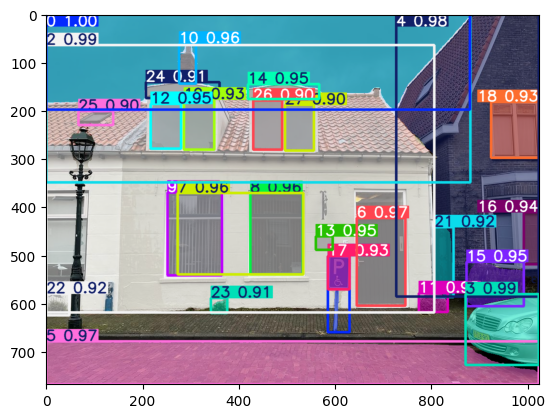

In [14]:
plt.imshow( cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB) )
#plt.imshow( results[0].plot() )

In [17]:
recs = []
resdata = results[0].boxes.data
print(resdata.numpy())

[[          0           0         882         198      0.9962           0]
 [          0           0        1020         578     0.99211           1]
 [        871         580        1023         728      0.9865           2]
 [        728           0        1023         585     0.98557           3]
 [          0          61         808         618     0.98523           4]
 [          0         680        1023         768     0.97488           5]
 [        645         423         747         605      0.9737           6]
 [        773         579         834         618       0.965           7]
 [        276          61         311         144     0.95681           8]
 [        874         515         995         606     0.94513           9]
 [        218         186         280         279     0.94042          10]
 [        560         461         595         488     0.93575          11]
 [        419         145         566         176     0.93417          12]
 [        585         502

In [18]:
print(results[0].masks[10])

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])
orig_shape: (768, 1024)
shape: torch.Size([1, 768, 1024])
xy: [array([[        231,         186],
       [        230,         187],
       [        225,         187],
       [        223,         189],
       [        223,         191],
       [        222,         192],
       [        222,         193],
       [        221,         194],
       [        221,         223],
       [        220,         224],
       [        220,         227],
       [        219,         228],
       [        219,         235],
       [        220,         236],
       [     

In [19]:
print(results[0].masks[10].xy[0])

[[        231         186]
 [        230         187]
 [        225         187]
 [        223         189]
 [        223         191]
 [        222         192]
 [        222         193]
 [        221         194]
 [        221         223]
 [        220         224]
 [        220         227]
 [        219         228]
 [        219         235]
 [        220         236]
 [        220         240]
 [        219         241]
 [        219         255]
 [        218         256]
 [        218         273]
 [        219         274]
 [        219         275]
 [        221         277]
 [        222         277]
 [        223         278]
 [        245         278]
 [        246         279]
 [        273         279]
 [        274         278]
 [        277         278]
 [        278         277]
 [        278         272]
 [        279         271]
 [        279         228]
 [        280         227]
 [        280         192]
 [        279         191]
 [        279         189]
 

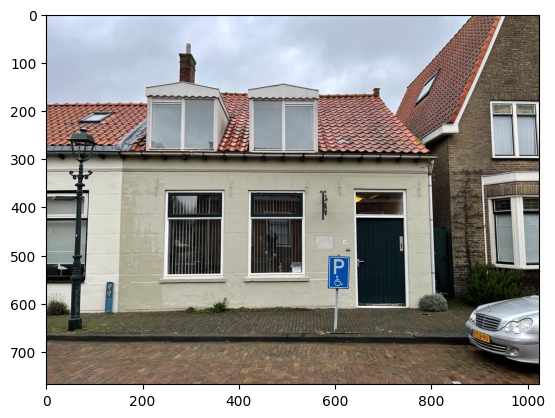

In [20]:
ima = results[0].orig_img
plt.imshow(cv.cvtColor(ima, cv.COLOR_BGR2RGB))
#print(results[0].orig_img)

### segment with box prompt

In [59]:
np.random.seed(3)

def show_anns(anns, borders=True): # results[0].masks
    if len(anns) == 0:
        return
    ax = plt.gca()
    ax.set_autoscale_on(False)

    a = torch.squeeze(anns[0].data).numpy()
    img = np.ones((a.shape[0], a.shape[1], 4))
    img[:, :, 3] = 0

    for ann in anns:
        m = torch.squeeze(ann.data).numpy()
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = [1,1,1,0.5] #color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (1, 0, 0, 1), thickness=2) 

    ax.imshow(img)

#### sam2_b.pt, 9 sec per image

In [23]:
results = model("autoima/279_1440x960.jpg", 
                #bboxes=[[645, 419, 747, 606], [244, 365, 370, 548]],
                bboxes=[[6.44558777e+02, 4.19455902e+02, 7.47316223e+02, 6.05776611e+02],
       [2.43842331e+02, 3.65007141e+02, 3.69575989e+02, 5.48374329e+02],
       [4.18828156e+02, 3.66125946e+02, 5.38220032e+02, 5.46349548e+02],
       [9.21486145e+02, 1.78639862e+02, 1.02272845e+03, 3.03175629e+02],
       [9.17358704e+02, 3.77394897e+02, 1.02333466e+03, 5.29184265e+02],
       [8.39920044e-02, 3.65853912e+02, 8.86896515e+01, 5.54587769e+02],
       [4.24171356e+02, 1.73489075e+02, 5.63127319e+02, 2.88164673e+02],
       [6.40547791e+02, 3.63582825e+02, 7.50499084e+02, 6.09418640e+02],
       [2.13154999e+02, 1.71023926e+02, 3.54245514e+02, 2.83654358e+02]],
                project="segment_everything", save=True, save_txt=True)


image 1/1 Y:\ai\projects\IM1102\run1\autoima\279_1440x960.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 8763.9ms
Speed: 27.9ms preprocess, 8763.9ms inference, 62.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to segment_everything\predict8
1 label saved to segment_everything\predict8\labels


In [19]:
print(results[0].masks[0].xy)

[array([[        672,         423],
       [        671,         424],
       [        648,         424],
       [        647,         425],
       [        646,         425],
       [        646,         426],
       [        645,         427],
       [        645,         486],
       [        646,         487],
       [        646,         519],
       [        647,         520],
       [        647,         571],
       [        648,         572],
       [        648,         598],
       [        649,         599],
       [        649,         603],
       [        650,         604],
       [        653,         604],
       [        654,         605],
       [        672,         605],
       [        673,         604],
       [        730,         604],
       [        731,         605],
       [        745,         605],
       [        746,         604],
       [        746,         591],
       [        747,         590],
       [        747,         586],
       [        746

In [21]:
model2 = SAM("mobile_sam.pt")
model2.info()

Model summary: 351 layers, 10,130,092 parameters, 10,130,092 gradients


(351, 10130092, 10130092, 0.0)

In [24]:
results2 = model2("autoima/279_1440x960.jpg", 
                #bboxes=[[645, 419, 747, 606], [244, 365, 370, 548]],
                bboxes=[[6.44558777e+02, 4.19455902e+02, 7.47316223e+02, 6.05776611e+02],
       [2.43842331e+02, 3.65007141e+02, 3.69575989e+02, 5.48374329e+02],
       [4.18828156e+02, 3.66125946e+02, 5.38220032e+02, 5.46349548e+02],
       [9.21486145e+02, 1.78639862e+02, 1.02272845e+03, 3.03175629e+02],
       [9.17358704e+02, 3.77394897e+02, 1.02333466e+03, 5.29184265e+02],
       [8.39920044e-02, 3.65853912e+02, 8.86896515e+01, 5.54587769e+02],
       [4.24171356e+02, 1.73489075e+02, 5.63127319e+02, 2.88164673e+02],
       [6.40547791e+02, 3.63582825e+02, 7.50499084e+02, 6.09418640e+02],
       [2.13154999e+02, 1.71023926e+02, 3.54245514e+02, 2.83654358e+02]],
                project="segment_everything", save=True, save_txt=True)


image 1/1 Y:\ai\projects\IM1102\run1\autoima\279_1440x960.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 2456.2ms
Speed: 49.3ms preprocess, 2456.2ms inference, 78.1ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to segment_everything\predict9
1 label saved to segment_everything\predict9\labels


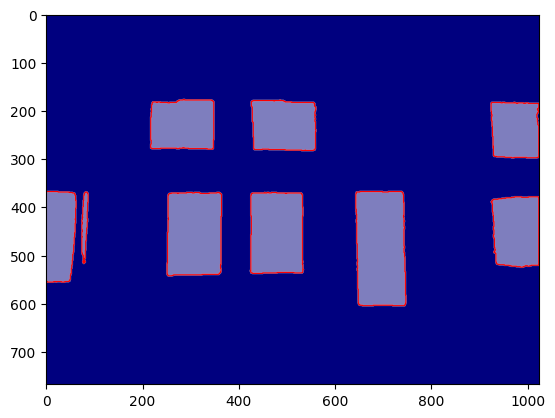

In [63]:
a = torch.squeeze(results2[0].masks[0].data).numpy()
image=np.uint8(np.zeros(a.shape))
plt.figure()
plt.imshow(image, cmap='jet')
show_anns(results2[0].masks)
#plt.axis('off')
plt.show()